Binomial Logistic Regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("./Data/User_Data.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x=data.iloc[:,[2,3]].values
y=data.iloc[:,4].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

In [6]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0).fit(x_train,y_train)

In [7]:
y_pred=classifier.predict(x_test)

Testing Performance of the model - confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix : \n',cm)

Confusion Matrix : 
 [[65  3]
 [ 8 24]]


for above cell 
Out of 100 : 
True Positive + True Negative = 65 + 24
False Positive + False Negative = 3 + 8
Performance Measure - Accuracy

In [9]:
from sklearn.metrics import accuracy_score
print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.89


Visualizing Performance of our model

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


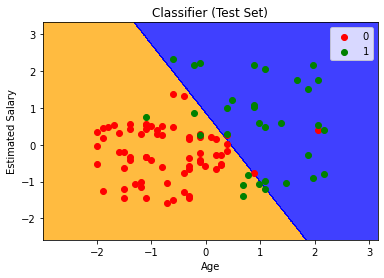

In [10]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test

x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1,  step=0.01), np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,  step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('orange','blue')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)

plt.title('Classifier (Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()